In [12]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


In [28]:
# reading csv-like file

names_discrete=["x","h","Re(r)","Im(r)","T","f","|r|","|a|","|b|","|a'|","ds_count"]
names_cont=["x", "Re(a(x))", "Im(a(x))", "|a(x)|", "arg(a(x))", "Re(b(x))", "Im(b(x))", "|b(x)|", "arg(b(x))", "Re(r(x))", "Im(r(x))", "|r(x)|", "arg(r(x))"]
names_signal=["t/T","|U0|2In","ReU0In","ImU0In","|U0|2Out","ReU0Out","ImU0Out","Nothing"]
names_nft=["t/T","Re(U)","Im(U)","|U|2","Re(UNFT)","Im(UNFT)","|UNFT|2","Re(Diff)","Im(Diff)","|Diff|2"]

# df = pd.read_csv('data/_DiscreteSpectrum.dat', index_col=0, sep='\t')
df_discrete = pd.read_csv('data/_DiscreteSpectrum.dat', sep='\t', names=names_discrete)
df_cont = pd.read_csv('data/hContSpec_0_ContinuousSpectrum.dat', sep='\t', names=names_cont)
df_signal = pd.read_csv('data/InOutU.dat', sep='\t', names=names_signal)
df_nft = pd.read_csv('data/NFTvsExactStandard_SpS=2.dat', sep='\t', names=names_nft)

# print(df_discrete)
print(df_signal)

                t/T  |U0|2In  ReU0In  ImU0In      |U0|2Out   ReU0Out  \
0     -1.519288e-08      0.0     0.0     0.0  2.691419e-07  0.000307   
1     -1.519241e-08      0.0     0.0     0.0  3.418249e-07  0.000402   
2     -1.519195e-08      0.0     0.0     0.0  2.326969e-07  0.000286   
3     -1.519149e-08      0.0     0.0     0.0  1.076265e-07  0.000269   
4     -1.519102e-08      0.0     0.0     0.0  2.502972e-08  0.000155   
...             ...      ...     ...     ...           ...       ...   
65531  1.519056e-08      0.0     0.0     0.0  1.182918e-06  0.000512   
65532  1.519102e-08      0.0     0.0     0.0  9.589624e-07  0.000596   
65533  1.519149e-08      0.0     0.0     0.0  5.331985e-07  0.000497   
65534  1.519195e-08      0.0     0.0     0.0  3.780391e-07  0.000465   
65535  1.519241e-08      0.0     0.0     0.0  3.330130e-07  0.000338   

        ImU0Out  Nothing  
0      0.000418      NaN  
1      0.000424      NaN  
2      0.000389      NaN  
3      0.000188      NaN  


(65536,)


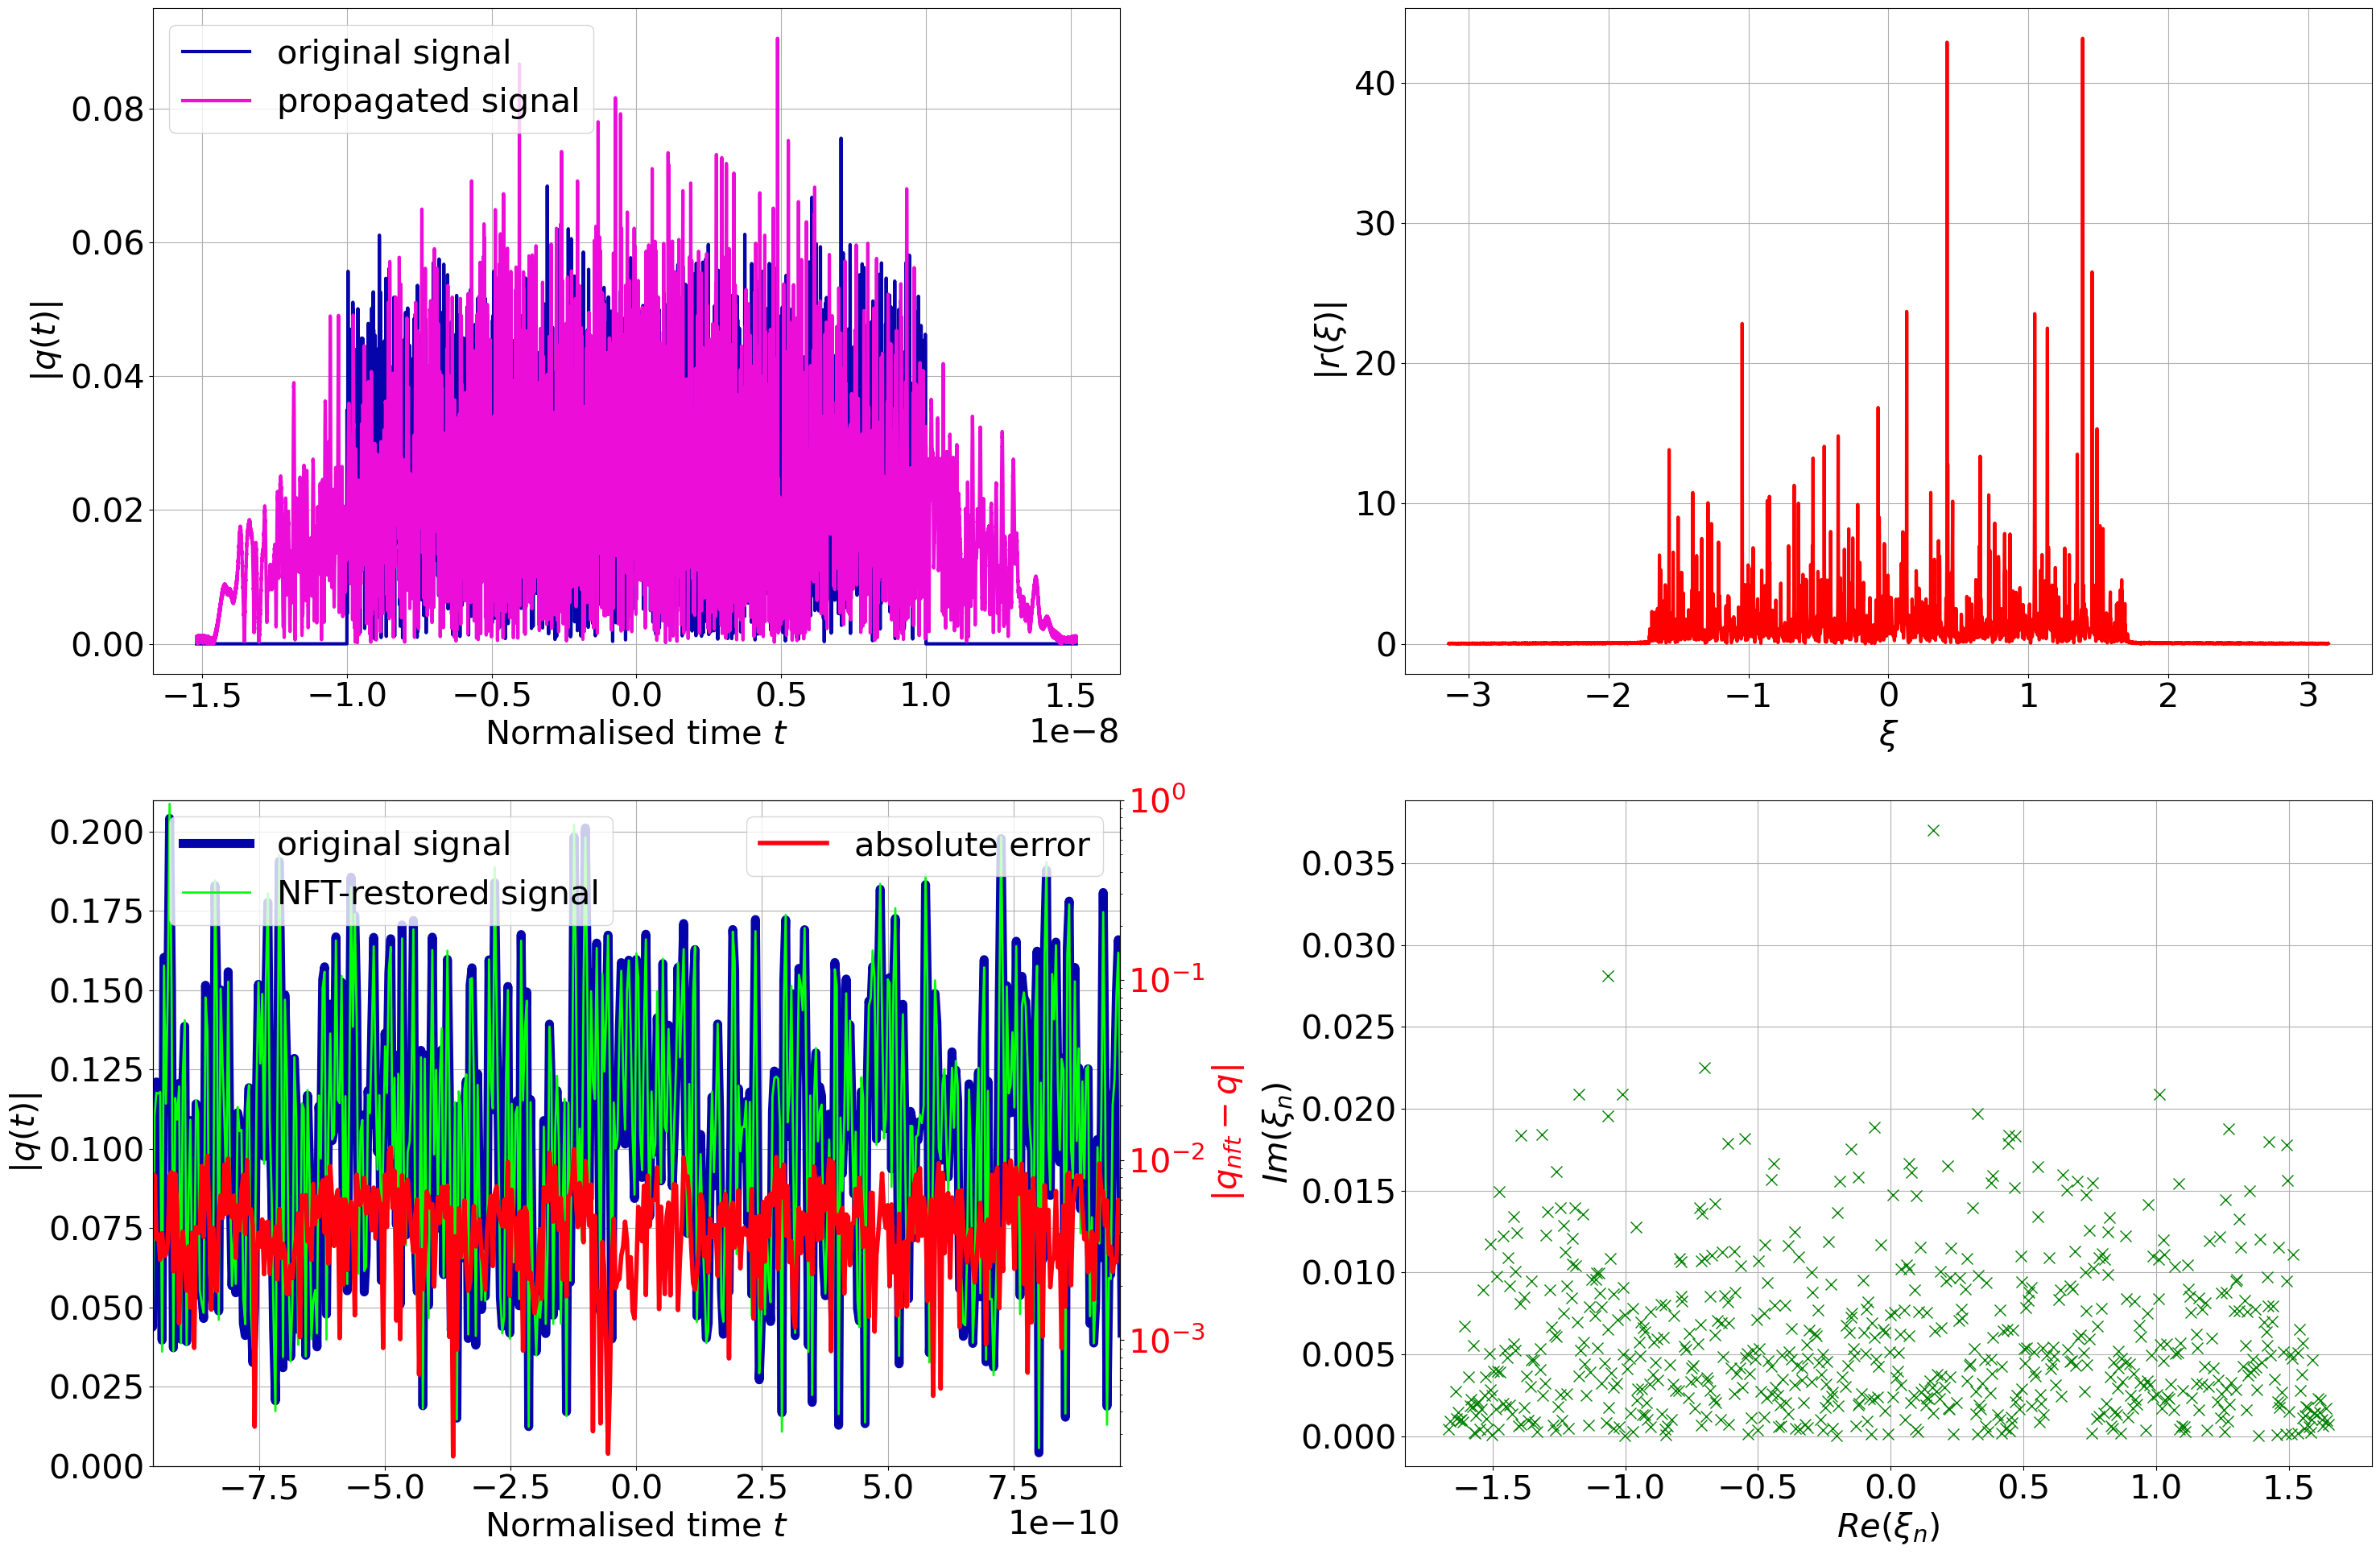

In [82]:
matplotlib.rcParams.update({'font.size': 30})

t = df_signal['t/T']

print(np.shape(t))
signal_in = df_signal['ReU0In'] + 1.0j * df_signal['ImU0In']
signal_out = df_signal['ReU0Out'] + 1.0j * df_signal['ImU0Out']


t_nft = df_nft['t/T']
sampling = int(len(t) / len(t_nft))
dt = t[1] - t[0]
t_nft = t_nft * dt * sampling
nft_u = df_nft['Re(U)'] + 1.0j * df_nft['Im(U)']
nft_out = df_nft['Re(UNFT)'] + 1.0j * df_nft['Im(UNFT)']

xi = df_cont['x']
a_xi = df_cont["Re(a(x))"] + 1.0j * df_cont["Im(a(x))"]
b_xi = df_cont["Re(b(x))"] + 1.0j * df_cont["Im(b(x))"]
r_xi = b_xi / a_xi

xi_d = df_discrete['x'] + 1.0j * df_discrete['h']

t_plot_lim = 128 * dt * sampling
t_plot_full_lim = 1348 * dt * sampling

fig, axs = plt.subplots(2, 2, figsize=(30,20))
axs[0][0].plot(t, np.absolute(signal_in),
               color='xkcd:royal blue', linewidth=3,
               label='original signal')
axs[0][0].plot(t, np.absolute(signal_out),
               color='xkcd:fuchsia', linewidth=3,
               label='propagated signal')
axs[0][0].set_xlabel('Normalised time $t$')
# axs[0][0].set_xlim(-t_plot_lim, t_plot_lim)
# axs[0][0].set_xlim(-t_plot_full_lim, t_plot_full_lim)
axs[0][0].set_ylabel(r'$|q(t)|$')
axs[0][0].legend()
axs[0][0].grid(True)

axs[1][0].plot(t_nft, np.absolute(nft_u),
               color='xkcd:royal blue', linewidth=8,
               label='original signal')
axs[1][0].plot(t_nft, np.absolute(nft_out),
               color='xkcd:bright green', linewidth=2,
               label='NFT-restored signal')
axs[1][0].set_xlabel('Normalised time $t$')
axs[1][0].set_ylabel(r'$|q(t)|$')
axs[1][0].set_xlim(-t_plot_lim, t_plot_lim)
axs[1][0].set_ylim(0, 0.21)
axs[1][0].legend(loc='upper left')
axs[1][0].grid(True)

color_add = 'xkcd:bright red'
ax_copy = axs[1][0].twinx()
ax_copy.plot(t_nft, np.absolute(nft_u-nft_out),
               color=color_add, linewidth=4,
               label='absolute error')
ax_copy.set_yscale('log')
ax_copy.set_ylim(0.2 * 10**(-3), 10**(-0))
ax_copy.set_ylabel(r'$|q_{nft} - q|$', color=color_add)
ax_copy.tick_params(axis='y', labelcolor=color_add)
ax_copy.legend()


axs[0][1].plot(xi, np.absolute(r_xi),
               'red', linewidth=3)
axs[0][1].set_xlabel(r'$\xi$')
axs[0][1].set_ylabel(r'$|r(\xi)|$')
# axs[0][1].set_xlim(-128, 128)
axs[0][1].grid(True)


axs[1][1].plot(np.real(xi_d), np.imag(xi_d),
               color='green', marker='x', markersize=10, linewidth=0)
axs[1][1].set_xlabel(r'$Re(\xi_n)$')
axs[1][1].set_ylabel(r'$Im(\xi_n)$')
# axs[1][1].set_xlim(-128, 128)
axs[1][1].grid(True)


fig.tight_layout()

fig.savefig('data/example3.png')
